In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as sk
from sklearn import preprocessing
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV
from functools import reduce 
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2000)

In [4]:
ADNIMERGE = pd.read_csv('ADNIMERGE.csv')
ADNIMERGE_DIC = pd.read_csv('ADNIMERGE_DICT.csv')
CDR = pd.read_csv('CDR.csv')
MOCA = pd.read_csv('MOCA.csv')
ECOGPT = pd.read_csv('ECOGPT.csv')
MMSE = pd.read_csv('MMSE.csv', encoding = "ISO-8859-1")
ECOGSP = pd.read_csv('ESOGSP.csv')  
ADAS_ADNI1 = pd.read_csv('ADAS_ADNI1.csv')
ADAS_ADNIGO23 = pd.read_csv('ADAS_ADNIGO23.csv')
ADASSCORES = pd.read_csv('ADASSCORES.csv')
PTDEMOG = pd.read_csv('PTDEMOG.csv')
DATADIC = pd.read_csv('DATADIC.csv', encoding = "ISO-8859-1")
SHQ = pd.read_csv('SHQ.csv')
#TELSCRNDEM = pd.read_csv('TELSCRNDEM.csv')

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8,58,59,60,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


How fast does Alzheimers progress? Does this progression differ along demographic lines? For this analysis we do a simple regression to predict a cognitive score based upon the initial baseline score and the number of months since the baseline. If we know a patient's cognitive score at the beginning, the a decrease in the score can be interpreted as progression of the disease. Having some measure of disease progression, we can now see what individual demographic factors influence the progression.

In [5]:
# Create a dataframe with Gender, Months since baseline (rounded), and recent CDR
time_from_base = ADNIMERGE[['PTGENDER', 'Month', 'CDRSB']]
time_from_base.dropna()
male_time_from_base = time_from_base.loc[time_from_base['PTGENDER'] == 'Male']
female_time_from_base = time_from_base.loc[time_from_base['PTGENDER'] == 'Female']



In [6]:
# split data into male and female and regress on CDRSB
lm_male = ols("CDRSB ~ PTGENDER + Month", data=male_time_from_base).fit()
lm_female = ols("CDRSB ~ PTGENDER + Month", data=female_time_from_base).fit()

# male results
print(lm_male.summary())

                            OLS Regression Results                            
Dep. Variable:                  CDRSB   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     71.80
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           3.09e-17
Time:                        01:36:43   Log-Likelihood:                -12292.
No. Observations:                5086   AIC:                         2.459e+04
Df Residuals:                    5084   BIC:                         2.460e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9406      0.051     37.723      0.0

In [7]:
# female results
print(lm_female.summary())

                            OLS Regression Results                            
Dep. Variable:                  CDRSB   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     69.56
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           1.01e-16
Time:                        01:36:43   Log-Likelihood:                -9720.7
No. Observations:                3930   AIC:                         1.945e+04
Df Residuals:                    3928   BIC:                         1.946e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7319      0.061     28.224      0.0

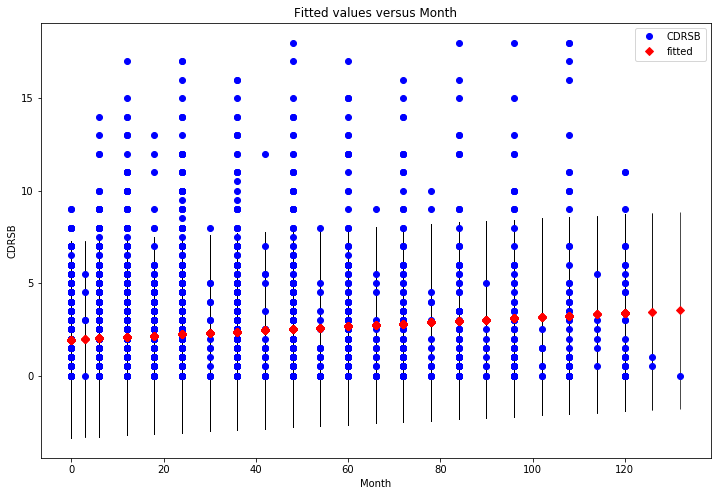

In [8]:
# male partial regressions 
fig, ax = plt.subplots(figsize=(12, 8))
#fig = plt.figure(figsize=(12,8))
#fig = sm.graphics.plot_partregress_grid(lm_male, fig=fig)
fig = sm.graphics.plot_fit(lm_male, "Month", ax=ax)


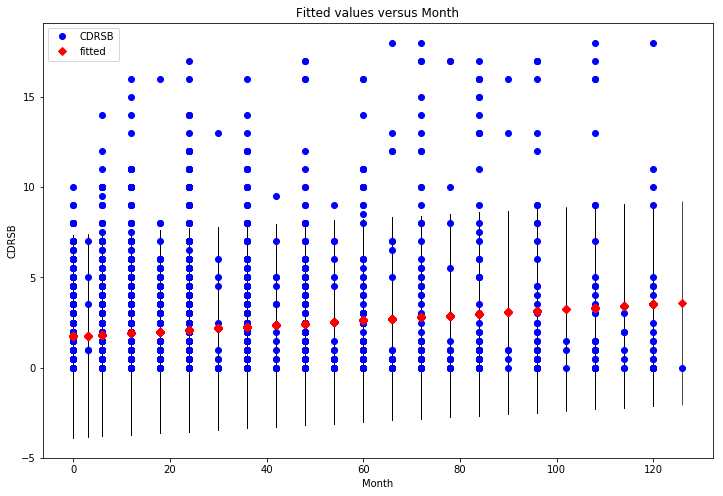

In [9]:
# female partial regressions
fig, ax = plt.subplots(figsize=(12, 8))
#fig = plt.figure(figsize=(12,8))
#fig = sm.graphics.plot_partregress_grid(lm_female, fig=fig)
fig = sm.graphics.plot_fit(lm_female, "Month", ax=ax)

In [10]:
time_from_base_2 = ADNIMERGE[['PTGENDER', 'Month', 'DX_bl', 'CDRSB']]
time_from_base_2.dropna()
male_time_from_base_2 = time_from_base_2.loc[time_from_base_2['PTGENDER'] == 'Male']
male_time_from_base_2 = male_time_from_base_2.loc[male_time_from_base_2['DX_bl'] == 'AD']

lm_male_2 = ols("CDRSB ~ PTGENDER + Month + DX_bl", data=male_time_from_base_2).fit()

print(lm_male_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  CDRSB   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     102.1
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           2.82e-22
Time:                        01:36:44   Log-Likelihood:                -1424.6
No. Observations:                 600   AIC:                             2853.
Df Residuals:                     598   BIC:                             2862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4224      0.149     29.704      0.0

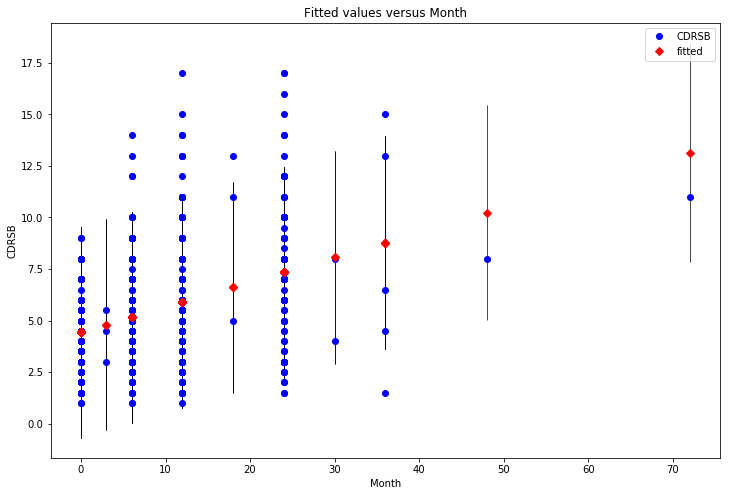

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(lm_male_2, "Month", ax=ax)




In [12]:
female_time_from_base_2 = time_from_base_2.loc[time_from_base_2['PTGENDER'] == 'Female']
female_time_from_base_2 = female_time_from_base_2.loc[female_time_from_base_2['DX_bl'] == 'AD']

lm_female_2 = ols("CDRSB ~ PTGENDER + Month + DX_bl", data=female_time_from_base_2).fit()

print(lm_female_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  CDRSB   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     129.9
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           7.65e-27
Time:                        01:36:45   Log-Likelihood:                -1146.4
No. Observations:                 489   AIC:                             2297.
Df Residuals:                     487   BIC:                             2305.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4202      0.161     27.462      0.0

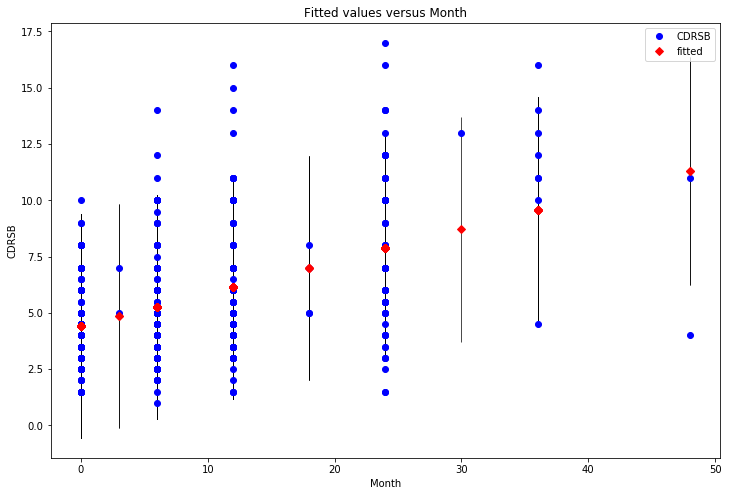

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(lm_female_2, "Month", ax=ax)

In [14]:
df = ADNIMERGE[['RID', 'VISCODE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'Month', 'CDRSB']].copy()
df = df.dropna()

As we can see from the partial regressions and the coefficients of our predictors, there seems to be little difference between men and womens' cognitive decline with respect to months from baseline. We add additional demographic predictors to see their effect on disease progression

In [15]:
# We add additional demographic predictors to our simple regression
lm_2 = ols("CDRSB ~ C(PTGENDER) + AGE + C(APOE4) + PTEDUCAT + Month + C(PTETHCAT) + C(PTRACCAT) + C(PTMARRY)", data=df).fit()

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  CDRSB   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     71.36
Date:                Fri, 08 Dec 2017   Prob (F-statistic):          5.96e-244
Time:                        01:36:45   Log-Likelihood:                -21366.
No. Observations:                8957   AIC:                         4.277e+04
Df Residuals:                    8938   BIC:                         4.290e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [16]:
df_3 = ADNIMERGE[['RID', 'VISCODE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'Month', 'CDRSB']].copy()
df_3 = df_3.loc[df_3['DX_bl'] == 'AD']
df_3 = df_3.dropna()
lm_3 = ols("CDRSB ~ C(PTGENDER) + AGE + C(APOE4) + PTEDUCAT + Month + C(PTETHCAT) + C(PTRACCAT) + C(PTMARRY)", data=df_3).fit()

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  CDRSB   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     20.31
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           5.24e-46
Time:                        01:36:45   Log-Likelihood:                -2538.8
No. Observations:                1085   AIC:                             5108.
Df Residuals:                    1070   BIC:                             5182.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [17]:
df_4 = ADNIMERGE[['RID', 'VISCODE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'Month', 'CDRSB']].copy()
df_4 = df_3.loc[df_3['DX_bl'] == 'AD']
df_4 = df_3.dropna()
lm_4 = ols("CDRSB ~ AGE + Month + C(PTETHCAT) + C(PTRACCAT) + C(PTMARRY)", data=df_4).fit()

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  CDRSB   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     27.60
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           2.93e-47
Time:                        01:36:45   Log-Likelihood:                -2542.5
No. Observations:                1085   AIC:                             5107.
Df Residuals:                    1074   BIC:                             5162.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [18]:
# Add column for current smoker to the dataframe
df_5 = ADNIMERGE[['RID', 'VISCODE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'Month', 'CDRSB']].copy()
df_5 = df_5.loc[df_5['DX_bl'] == 'AD']
sqh_df = SHQ[['RID', 'VISCODE', 'SHQCURR']].copy()


df_5 = pd.merge(df_5, sqh_df, on='RID')
df_smoking = df_5.dropna()
df_smoking.head(100)

,RID,VISCODE_x,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,Month,CDRSB,VISCODE_y,SHQCURR
0,83,bl,AD,73.2,Male,17,Not Hisp/Latino,White,Married,0,2.5,sc3va,0.0
1,83,bl,AD,73.2,Male,17,Not Hisp/Latino,White,Married,0,2.5,m12va2,0.0
2,83,m06,AD,73.2,Male,17,Not Hisp/Latino,White,Married,6,4.0,sc3va,0.0
3,83,m06,AD,73.2,Male,17,Not Hisp/Latino,White,Married,6,4.0,m12va2,0.0
4,83,m12,AD,73.2,Male,17,Not Hisp/Latino,White,Married,12,3.0,sc3va,0.0
5,83,m12,AD,73.2,Male,17,Not Hisp/Latino,White,Married,12,3.0,m12va2,0.0
6,83,m24,AD,73.2,Male,17,Not Hisp/Latino,White,Married,24,6.0,sc3va,0.0
7,83,m24,AD,73.2,Male,17,Not Hisp/Latino,White,Married,24,6.0,m12va2,0.0
15,286,bl,AD,65.9,Male,16,Not Hisp/Latino,White,Married,0,4.0,sc3va,0.0
16,286,bl,AD,65.9,Male,16,Not Hisp/Latino,White,Married,0,4.0,m12va2,0.0


In [19]:
#lm_smoking = ols("CDRSB ~ C(SHQCURR) + Month", data=df_smoking).fit()
lm_smoking = ols("CDRSB ~ AGE + Month + C(PTETHCAT) + C(PTRACCAT) + C(PTMARRY) + C(SHQCURR)", data=df_smoking).fit()

lm_smoking.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CDRSB   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     14.34
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           3.18e-11
Time:                        01:36:45   Log-Likelihood:                -163.74
No. Observations:                  92   AIC:                             341.5
Df Residuals:                      85   BIC:                             359.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      10.6784      1.558      6.852      0.000       7.580      13.777
C(PTRACCAT)[T.White]           -1.9914      0.581     -3.429      0.001      -3.146      -0.837
C(PTMARRY)[T.Married]          -1.7487      0.505     -3.466      0.001      -2.752      -0.745
C(PTMARRY)[T.Never married]    -1.7448      0.861     -2.025      0.046      -3.457      -0.032
C(PTMARRY)[T.Widowed]           0.4001      0.822      0.487      0.628      -1.234       2.034
AGE                            -0.0430      0.024     -1.773      0.080      -0.091       0.005
Month                           0.1117      0.018      6.322      0.000       0.077       0.147
==============================================================================
Omnibus:                        3.241   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                3.226
Skew:                           0.424   Prob(JB):                        0.199
Kurtosis:                       2.648   Cond. No.                         781.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# We used all of the demographic predictors looked at so far to build a predictive model, 
# predicting cognitive decline given time from baseline

# create a new dataframe
df_6 = ADNIMERGE[['RID', 'VISCODE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'Month', 'CDRSB']].copy()


# turn categoricals into dummy variables
df_6 = pd.get_dummies(df_6)
df_6 = df_6.dropna()

# change datatypes to scikit manageable types
df_6['AGE'] = df_6['AGE'].astype(int)
df_6['CDRSB'] = df_6['CDRSB'].astype(int)

# create array from df
X = df_6[['RID', 'AGE', 'PTEDUCAT', 'Month', 'VISCODE_bl', 'VISCODE_m03',
       'VISCODE_m06', 'VISCODE_m102', 'VISCODE_m108', 'VISCODE_m114',
       'VISCODE_m12', 'VISCODE_m120', 'VISCODE_m126', 'VISCODE_m18',
       'VISCODE_m24', 'VISCODE_m30', 'VISCODE_m36', 'VISCODE_m42',
       'VISCODE_m48', 'VISCODE_m54', 'VISCODE_m60', 'VISCODE_m66',
       'VISCODE_m72', 'VISCODE_m78', 'VISCODE_m84', 'VISCODE_m90',
       'VISCODE_m96', 'DX_bl_AD', 'DX_bl_CN', 'DX_bl_EMCI', 'DX_bl_LMCI',
       'DX_bl_SMC', 'PTGENDER_Female', 'PTGENDER_Male', 'PTETHCAT_Hisp/Latino',
       'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown',
       'PTRACCAT_Am Indian/Alaskan', 'PTRACCAT_Asian', 'PTRACCAT_Black',
       'PTRACCAT_Hawaiian/Other PI', 'PTRACCAT_More than one',
       'PTRACCAT_Unknown', 'PTRACCAT_White', 'PTMARRY_Divorced',
       'PTMARRY_Married', 'PTMARRY_Never married', 'PTMARRY_Unknown',
       'PTMARRY_Widowed']].values
y = df_6[['CDRSB']].values


# split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalize the data
X_train = normalize(X_train, norm='l1', axis=0)
y_train = normalize(y_train, norm='l1', axis=0)
X_test = normalize(X_test, norm='l1', axis=0)
y_test = normalize(y_test, norm='l1', axis=0)

#min_max_scaler = MinMaxScaler()
#X_train = min_max_scaler.fit_transform(X_train)
#X_test = min_max_scaler.fit_transform(X_test)

# create linear regression object 
lm = linear_model.LinearRegression()

# train the model and make predictions
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

#print out coefficients
print('Coefficients: \n', lm.coef_[0], lm.intercept_)

# Calculate MSE
train_MSE2= np.mean((y_train - lm.predict(X_train))**2)
test_MSE2= np.mean((y_test - lm.predict(X_test))**2)
print("The training MSE is %2f, the testing MSE is %2f" %(train_MSE2, test_MSE2))
train_R_sq = lm.score(X_train, y_train)
test_R_sq = lm.score(X_test, y_test)
print('The train R^2 is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

Coefficients: 
 [  4.34639924e-02   7.11359526e-01  -1.84678465e-01  -2.75314076e-01
  -4.58016741e+05   5.83370188e+04  -4.10266834e+05   2.80050030e+04
  -2.59759000e+04  -7.61318796e+04  -3.68246923e+05  -1.87179273e+04
  -2.97517987e+04  -8.28937544e+04  -3.24699000e+05  -1.86900087e+05
  -2.11245321e+05  -9.75530676e+04  -1.62349462e+05  -6.01717776e+04
  -8.97696834e+04  -4.43868128e+03  -6.72317593e+04  -1.25748223e+04
  -5.19518053e+04  -6.86236254e+01  -3.59078629e+04   2.78750264e-01
  -1.64290284e-01  -2.08713365e-03   2.72905914e-01  -1.29764943e-02
  -1.17235213e+06  -1.49469380e+06   3.35284450e+05   1.08613534e+07
   5.40180501e+04   1.66715783e+04   1.91723155e+05   4.11787990e+05
   3.33431554e+03   8.33578926e+04   1.50044204e+04   9.34775422e+06
  -5.30799796e+05  -5.06073089e+06  -1.94516697e+05  -2.19792880e+04
  -8.29718096e+05] [-1607.32210038]
The training MSE is 0.000000, the testing MSE is 2798607.520591
The train R^2 is 0.4105081318205454, the test R^2 is -12

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [22]:
# Create cross-validated ridge regression 
lm_2 = sk.RidgeCV()
lm_2.fit (X_train, y_train)
y_pred = lm_2.predict(X_test)

#print out coefficients
print('Coefficients: \n', lm_2.coef_[0], lm_2.intercept_)

# Calculate MSE
train_MSE2= np.mean((y_train - lm_2.predict(X_train))**2)
test_MSE2= np.mean((y_test - lm_2.predict(X_test))**2)
print("The training MSE is %2f, the testing MSE is %2f" %(train_MSE2, test_MSE2))
train_R_sq = lm_2.score(X_train, y_train)
test_R_sq = lm_2.score(X_test, y_test)
print('The train R^2 is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

Coefficients: 
 [ -2.05208219e-04   1.57938166e-05  -4.41631374e-05   3.11197559e-04
  -4.59699706e-04   0.00000000e+00  -1.30197885e-04   0.00000000e+00
   6.55463680e-04   0.00000000e+00  -1.70486566e-05   4.23772901e-04
   0.00000000e+00   3.19028655e-04   1.06600686e-04   0.00000000e+00
   4.47794427e-05   0.00000000e+00   4.09026643e-05   0.00000000e+00
   6.05914262e-04   0.00000000e+00   5.30721824e-04   0.00000000e+00
   8.83279666e-04   0.00000000e+00   8.95761553e-04   2.83468522e-03
  -1.44033550e-03  -6.53242365e-04   5.87317979e-04  -1.45596823e-03
  -7.61748613e-05   5.97471955e-05  -1.10372155e-04   3.08509551e-06
   6.47515861e-05  -6.11343301e-04  -2.77042793e-05  -5.10018338e-04
  -2.05934397e-04  -3.83062775e-04  -6.39022416e-04   2.86410137e-05
  -5.38887738e-04   9.28600923e-05  -8.27227239e-04  -5.73881308e-04
  -1.25047685e-05] [ 0.00016563]
The training MSE is 0.000000, the testing MSE is 0.000000
The train R^2 is 0.011953024461034745, the test R^2 is -0.1145346

In [23]:
# create polynomial features and fit a regression
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=True)
cross_terms = gen_cross_terms.fit_transform(X_train)
X_train_with_cross = np.hstack((X_train, cross_terms))
cross_terms = gen_cross_terms.fit_transform(X_test)
X_test_with_cross =  np.hstack((X_test, cross_terms))

multi_regression_model = linear_model.LinearRegression(fit_intercept=True)
multi_regression_model.fit(X_train_with_cross, y_train)

train_MSE = np.mean((y_train - multi_regression_model.predict(X_train_with_cross))**2)
test_MSE = np.mean((y_test - multi_regression_model.predict(X_test_with_cross))**2)
print('The train MSE with interaction terms is {}, the test MSE is {}'.format(train_MSE, test_MSE))

train_R_sq = multi_regression_model.score(X_train_with_cross, y_train)
test_R_sq = multi_regression_model.score(X_test_with_cross, y_test)
print('The train R^2 with interaction terms is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))



The train MSE with interaction terms is 2.8136021847706287e-08, the test MSE is 91150710369.16728
The train R^2 with interaction terms is 0.4880107672338435, the test R^2 is -3.952088805499967e+17


In [24]:
ADNIMERGE.VISCODE.unique()
label_dist = pd.DataFrame({'label counts':list(ADNIMERGE.VISCODE)})
label_dist['label counts'].value_counts()


bl      1784
m06     1618
m12     1485
m24     1326
m18     1293
m36      855
m03      793
m30      750
m48      706
m60      415
m72      347
m42      307
m66      217
m78      213
m84      211
m54      200
m96      155
m90      129
m108     119
m120      82
m102       7
m126       4
m114       1
Name: label counts, dtype: int64

In [25]:
ADNIMERGE.SITE.unique()
label_dist = pd.DataFrame({'label counts':list(ADNIMERGE.SITE)})
label_dist['label counts'].value_counts()

128    521
27     472
23     417
127    388
137    386
41     369
37     349
21     345
2      342
33     336
116    327
130    312
72     291
11     283
67     270
73     267
36     266
94     256
99     252
141    247
3      242
126    239
22     234
31     234
14     232
7      231
16     230
29     229
18     226
68     204
123    203
5      198
12     195
100    191
9      184
98     182
35     173
32     172
6      171
52     170
941    170
13     166
57     150
136    149
114    149
135    143
82     134
24     129
109    109
53     107
129    106
10      96
153     95
131     92
133     89
51      89
19      76
62      52
20      47
70      20
121      5
132      5
168      2
301      1
Name: label counts, dtype: int64

In [35]:
# This code uses the following question: Do you prefer to stay home, rather than going out and doing new things?
# A regression here to test the hypothesis that this is correlated to cognitive decline
GDSCALE = pd.read_csv('GDSCALE.csv')
df_8 = ADNIMERGE[['RID', 'VISCODE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'Month', 'CDRSB']].copy()
home_df = GDSCALE[['RID', 'GDHOME']]
df_8 = pd.merge(df_8, home_df, on='RID')
df_home = df_8.dropna()
df_home.head(100)

lm_home = ols("CDRSB ~ C(GDHOME) + Month", data=df_home).fit()
lm_home.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CDRSB   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     534.4
Date:                Fri, 08 Dec 2017   Prob (F-statistic):               0.00
Time:                        03:48:12   Log-Likelihood:            -1.2356e+05
No. Observations:               51970   AIC:                         2.471e+05
Df Residuals:                   51966   BIC:                         2.472e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.3797      0.290     22.010      0.000       5.812       6.948
C(GDHOME)[T.0.0]    -4.9274      0.290    -16.983      0.000      -5.496      -4.359
C(GDHOME)[T.1.0]    -4.9091      0.291    -16.885      0.000      -5.479      -4.339
Month                0.0139      0.000     36.546      0.000       0.013       0.015
==============================================================================
Omnibus:                    25036.301   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150590.389
Skew:                           2.292   Prob(JB):                         0.00
Kurtosis:                       9.966   Cond. No.                     1.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

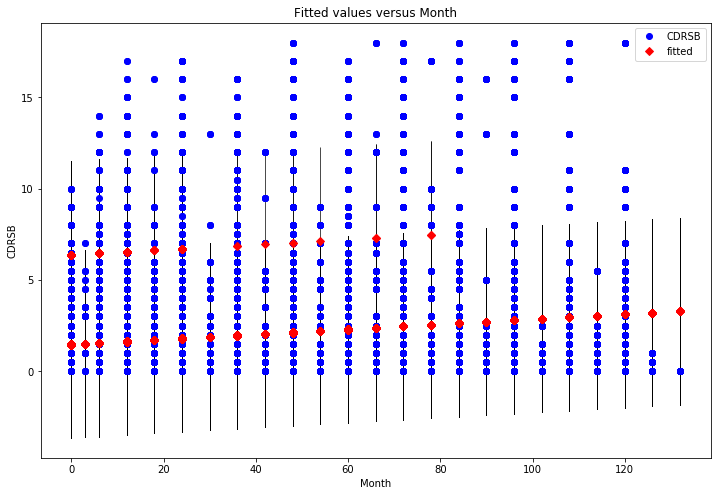

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(lm_home, "Month", ax=ax)

In [26]:
ADNIMERGE.COLPROT.unique()
label_dist = pd.DataFrame({'label counts':list(ADNIMERGE.COLPROT)})
label_dist['label counts'].value_counts()

ADNI2     6937
ADNI1     5013
ADNIGO     804
ADNI3      263
Name: label counts, dtype: int64

In [39]:
df_8 = df_8.loc[df_8['DX_bl'] == 'AD']
lm_home = ols("CDRSB ~ C(GDHOME) + Month", data=df_8).fit()
lm_home.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CDRSB   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     263.3
Date:                Fri, 08 Dec 2017   Prob (F-statistic):          1.08e-152
Time:                        04:22:36   Log-Likelihood:                -7558.6
No. Observations:                3201   AIC:                         1.513e+04
Df Residuals:                    3197   BIC:                         1.515e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.7637      0.443     17.531      0.000       6.895       8.632
C(GDHOME)[T.0.0]    -3.4362      0.443     -7.752      0.000      -4.305      -2.567
C(GDHOME)[T.1.0]    -3.3576      0.452     -7.428      0.000      -4.244      -2.471
Month                0.1304      0.005     26.995      0.000       0.121       0.140
==============================================================================
Omnibus:                      284.877   Durbin-Watson:                   0.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.214
Skew:                           0.695   Prob(JB):                     4.17e-91
Kurtosis:                       4.089   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

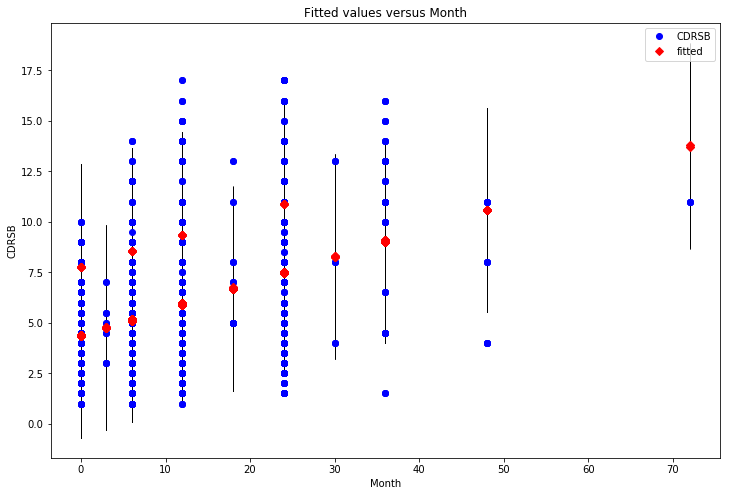

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(lm_home, "Month", ax=ax)

In [27]:
ADNIMERGE.ORIGPROT.unique()
label_dist = pd.DataFrame({'label counts':list(ADNIMERGE.ORIGPROT)})
label_dist['label counts'].value_counts()

ADNI1     6955
ADNI2     4896
ADNIGO    1121
ADNI3       45
Name: label counts, dtype: int64

In [28]:
ADNIMERGE.DX_bl.unique()
label_dist = pd.DataFrame({'label counts':list(ADNIMERGE.DX_bl)})
label_dist['label counts'].value_counts()

LMCI    4713
CN      3885
EMCI    2394
AD      1551
SMC      429
Name: label counts, dtype: int64

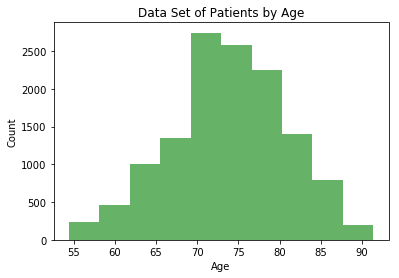

In [29]:
ADNIMERGE.AGE.unique()
label_dist = pd.DataFrame({'label counts':list(ADNIMERGE.AGE)})
label_dist['label counts'].value_counts()

# Note - histogram shows count of ages at appointments - depicts the age of patients
# being examined.

n, bins, patches = plt.hist(ADNIMERGE.AGE, 10, facecolor='green', alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Data Set of Patients by Age')
plt.show()

In [30]:
# Patient Gender by examination - not unique patients in the pool

ADNIMERGE.PTGENDER.unique()
label_dist = pd.DataFrame({'label counts':list(ADNIMERGE.PTGENDER)})
label_dist['label counts'].value_counts()

Male      7339
Female    5678
Name: label counts, dtype: int64